# Exploring Earth's Orbit with Euler, Runge-Kutta, and Verlet algorithms

In [148]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [149]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For offline use
cf.go_offline()

In [150]:
Au = 1.496e+11
yr = 3.154e+7
Sm = 1.989e+30
sunrad = 0.00465047 # in Au

In [151]:
# G amount check
4*np.pi**2*Au**3/(yr**2*Sm)

6.680305997591103e-11

In [152]:
G = 4*np.pi**2 # Au^3*MS^-1*yr^-2

In [153]:
Me = 1/(332946) # earth in Solar Masses
Ms = 1 # Sun in solar Masses
x0 = 0.9832899 #Au perihelion
y0 = 0
vx0 = 0
# vy0 = 2*np.pi # orbital velocity in au and yr
vy0 = 30.29/1.496e+8*3.154e+7

In [154]:
# initial values
x=x0
y=y0
vx= vx0
vy= vy0

xpos = np.array([x0])
ypos = np.array([y0])
xvels = np.array([vx0])
yvels = np.array([vy0])
TotalE = np.array([])


In [155]:
dt=.01
for i in np.linspace(0,1,101):
    r = np.sqrt(x**2+y**2)
    ax = -G*Ms*x/r**3
    ay = -G*Ms*y/r**3
    #calc next position and next vel
    x = x + vx*dt
    y = y + vy*dt
    vx = vx + ax*dt
    vy = vy + ay*dt
    xpos = np.append(xpos,x)
    ypos = np.append(ypos,y)
    TotalE = np.append(TotalE,.5*Me*(vx**2+vy**2)-G*Me*Ms/r)


In [192]:
df1 = pd.DataFrame({"X":xpos[:-1],"Y":ypos[:-1],'Time':np.linspace(0,1,101),'Earth':'Earth',
                    "Rad":2,'Color':'Green'})


ValueError: arrays must all be same length

### Size of the sun is enlarged for visibility

In [157]:
import plotly.express as px

fig = px.scatter(df1, x="X", y="Y", animation_frame="Time", animation_group="Earth",
           size='Rad', color="Color", hover_name="Earth", range_x=[-1.7,1.7], 
           range_y=[-1.7,1.7])
fig.update_layout(
    shapes=[ 
        # filled circle
        dict(
            type="circle",
            xref="x",
            yref="y",
            fillcolor="Orange",
            x0=-sunrad,
            y0=-sunrad,
            x1=sunrad,
            y1=sunrad,
            line_color="Orange",
        ),
    ], width=550,height=550
)
       

In [159]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=xpos, y=ypos)],
    layout=go.Layout(
        title=go.layout.Title(text="Innaccurate orbit simulation"),
        width=550,
        height=550
    )
)
fig.update_xaxes(range=[-1.7, 1.7])
fig.update_yaxes(range=[-1.7, 1.7])
fig.update_layout(
    shapes=[ 
        # filled circle
        dict(
            type="circle",
            xref="x",
            yref="y",
            fillcolor="Orange",
            x0=-sunrad,
            y0=-sunrad,
            x1=sunrad,
            y1=sunrad,
            line_color="Orange",
        ),
    ]
)
fig.show()

In [160]:
#figure = plt.figure()
#axes1 = figure.add_axes([0,0,1,1])
#axes1.plot(xpos,ypos)
#axes1.axis('equal')

Energy Change:  2.0226986453606428e-05


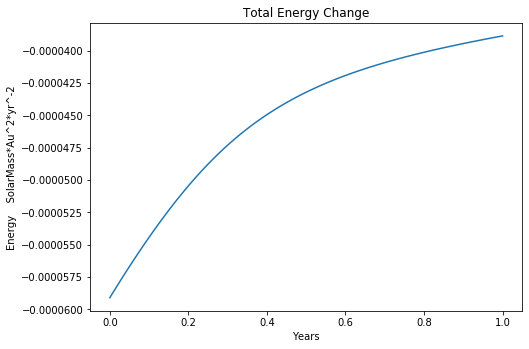

In [161]:
figure2 = plt.figure()
axes2 = figure2.add_axes([0,0,1,1])
axes2.plot(np.linspace(0,1,101),TotalE)
axes2.set(title='Total Energy Change',xlabel='Years',ylabel='Energy    SolarMass*Au^2*yr^-2')
print('Energy Change: ',TotalE.max()-TotalE.min())



This is obviously is a problem. We did not complete an orbit in a year, our orbit is expanding, and total energy was not conserved. This is due to innaccuracies in the Euler method. A partial remedy is to decrease step size.
We will let it go 3 years this time.

In [162]:
x=x0
y=y0
vx= vx0
vy= vy0

xpos = np.array([x0])
ypos = np.array([y0])
xvels = np.array([vx0])
yvels = np.array([vy0])
TotalE = np.array([])

dt=.001
for i in np.linspace(0,1,3001):
    r = np.sqrt(x**2+y**2)
    ax = -G*Ms*x/r**3
    ay = -G*Ms*y/r**3
    #calc next position and next vel
    x = x + vx*dt
    y = y + vy*dt
    vx = vx + ax*dt
    vy = vy + ay*dt
    xpos = np.append(xpos,x)
    ypos = np.append(ypos,y)
    TotalE = np.append(TotalE,.5*Me*(vx**2+vy**2)-G*Me*Ms/r)

In [163]:
fig = go.Figure(
    data=[go.Scatter(x=xpos, y=ypos)],
    layout=go.Layout(
        title=go.layout.Title(text="3 Year orbit approximation, not quite right"),
        width=550,
        height=550
    )
)
fig.update_xaxes(range=[-1.7, 1.7])
fig.update_yaxes(range=[-1.7, 1.7])
fig.update_layout(
    shapes=[ 
        # filled circle
        dict(
            type="circle",
            xref="x",
            yref="y",
            fillcolor="Orange",
            x0=-sunrad,
            y0=-sunrad,
            x1=sunrad,
            y1=sunrad,
            line_color="Orange",
        ),
    ]
)
fig.show()

In [164]:
#figure = plt.figure()
#axes1 = figure.add_axes([0,0,1,1])
#axes1.plot(xpos,ypos,linewidth=2)
#axes1.set_xlim([-1.2,1.2])
#axes1.set_ylim([-1.2,1.2])
#axes1.axis('equal')

Energy Change:  9.757284920771528e-06


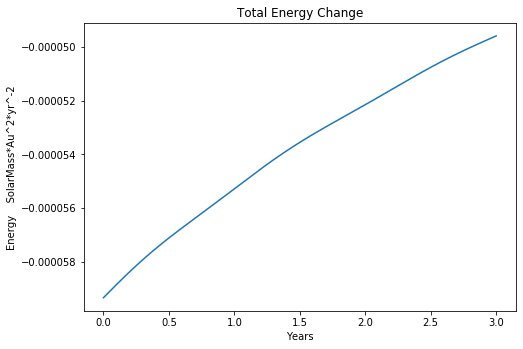

In [165]:
figure2 = plt.figure()
axes2 = figure2.add_axes([0,0,1,1])
axes2.plot(np.linspace(0,3,3001),TotalE)
axes2.set(title='Total Energy Change',xlabel='Years',ylabel='Energy    SolarMass*Au^2*yr^-2')
print('Energy Change: ',TotalE.max()-TotalE.min())

We still see an increase in Total Energy although not as severe. After decreasing our step size  
by a factor of 10 we see only a modest effect on Total Energy inflation

--------------------
## 2nd Order Runge-Kutta
This is a much more accurate method, we should be able to lengthen our step size and still expect more accuracy.  
We could opt for 4th order but this should be accurate enough.

In [166]:
x=x0
y=y0
vx= vx0
vy= vy0
xpos = np.array([x0])
ypos = np.array([y0])
xvels = np.array([vx0])
yvels = np.array([vy0])
TotalE = np.array([])
dt = .01
for i in np.linspace(0,1,101):
    r = np.sqrt(x**2+y**2)
    TotalE = np.append(TotalE,.5*Me*(vx**2+vy**2)-G*Me*Ms/r)
    ax = -G*Ms*x/r**3
    ay = -G*Ms*y/r**3
    #estimates halfway across dt
    xmid = x+vx*.5*dt
    vxmid = vx+ax*.5*dt
    ymid = y+vy*.5*dt
    vymid = vy+ay*.5*dt
    axmid = -G*Ms*xmid/(xmid**2+ymid**2)**(3/2)
    aymid = -G*Ms*ymid/(xmid**2+ymid**2)**(3/2)
    #full Euler Step
    xnew  =  x + vxmid*dt
    ynew  =  y + vymid*dt
    vxnew = vx + axmid*dt
    vynew = vy + aymid*dt

    xpos = np.append(xpos,xnew)
    ypos = np.append(ypos,ynew)
    xvels = np.append(xvels,vxnew)
    yvels = np.append(yvels,vxnew)
        
    #set new as old
    x,y,vx,vy = xnew,ynew,vxnew,vynew


In [167]:
fig = go.Figure(
    data=[go.Scatter(x=xpos, y=ypos)],
    layout=go.Layout(
        title=go.layout.Title(text="Runge-Kutta Method"),
        width=550,
        height=550
    )
)
fig.update_xaxes(range=[-1.2, 1.2])
fig.update_yaxes(range=[-1.2, 1.2])
fig.update_layout(
    shapes=[ 
        # filled circle
        dict(
            type="circle",
            xref="x",
            yref="y",
            fillcolor="Orange",
            x0=-sunrad,
            y0=-sunrad,
            x1=sunrad,
            y1=sunrad,
            line_color="Orange",
        ),
    ]
)
fig.show()

In [168]:
#figure = plt.figure()
#axes1 = figure.add_axes([0,0,1,1])
#axes1.plot(xpos,ypos,linewidth=1) #algorithm give a little overlap on the end
#axes1.set_xlim([-1.2,1.2])
#axes1.set_ylim([-1.2,1.2])
#axes1.axis('equal')


ValueError: x and y must have same first dimension, but have shapes (101,) and (10001,)

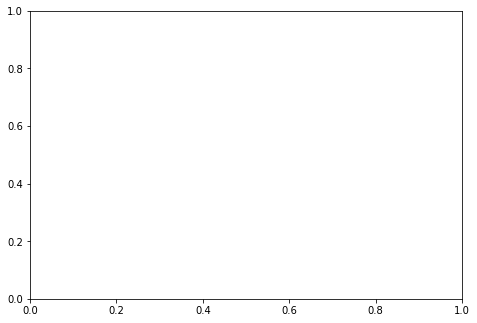

In [193]:
figure3 = plt.figure()
axes3 = figure3.add_axes([0,0,1,1])
axes3.plot(np.linspace(0,1,101),TotalE)
TotalE.max()-TotalE.min()
axes3.set(title='RK2 Total Energy Change',xlabel='Time',ylabel='Energy SolarMass*Au^2*yr^-2')


In [170]:
# Energy Gain RK2  over Energy Gain Euler Δt = .05
1.2225685934532683e-08/2.0226986453606428e-05

0.0006044244881744542

Our False energy gain is now less than 1/1000 of what we started with and is close to 0

Much Better, Check over a time period of 10 years to look for false Total Energy inflation 

In [171]:
x=x0
y=y0
vx= vx0
vy= vy0
xpos = np.array([x0])
ypos = np.array([y0])
xvels = np.array([vx0])
yvels = np.array([vy0])
TotalE = np.array([])
dt = .01
for i in np.linspace(0,10,1001):
    r = np.sqrt(x**2+y**2)
    TotalE = np.append(TotalE,.5*Me*(vx**2+vy**2)-G*Me*Ms/r)
    ax = -G*Ms*x/r**3
    ay = -G*Ms*y/r**3
    #estimates halfway across dt
    xmid = x+vx*.5*dt
    vxmid = vx+ax*.5*dt
    ymid = y+vy*.5*dt
    vymid = vy+ay*.5*dt
    axmid = -G*Ms*xmid/(xmid**2+ymid**2)**(3/2)
    aymid = -G*Ms*ymid/(xmid**2+ymid**2)**(3/2)
    #full Euler Step
    xnew  =  x + vxmid*dt
    ynew  =  y + vymid*dt
    vxnew = vx + axmid*dt
    vynew = vy + aymid*dt

    xpos = np.append(xpos,xnew)
    ypos = np.append(ypos,ynew)
    xvels = np.append(xvels,vxnew)
    yvels = np.append(yvels,vxnew)
        
    #set new as old
    x,y,vx,vy = xnew,ynew,vxnew,vynew


In [172]:
fig = go.Figure(
    data=[go.Scatter(x=xpos, y=ypos)],
    layout=go.Layout(
        title=go.layout.Title(text="Orbit over 10 Years w/ Runge-Kutta"),
        width=550,
        height=550
    )
)
fig.update_xaxes(range=[-1.2, 1.2])
fig.update_yaxes(range=[-1.2, 1.2])
fig.update_layout(
    shapes=[ 
        # filled circle
        dict(
            type="circle",
            xref="x",
            yref="y",
            fillcolor="Orange",
            x0=-sunrad,
            y0=-sunrad,
            x1=sunrad,
            y1=sunrad,
            line_color="Orange",
        ),
    ]
)
print('Zoom in on path to see consistency')
fig.show()


Zoom in on path to see consistency


In [32]:
#figure = plt.figure()
#axes1 = figure.add_axes([0,0,1,1])
#axes1.plot(xpos,ypos,linewidth=.1) 
#axes1.set_xlim([-1.2,1.2])
#axes1.set_ylim([-1.2,1.2])
#axes1.axis('equal')
#axes1.fill_between(x, 0, y1)

Zooming in on the far right side, we can see how closely the orbital paths follow each other

(-0.075, 0.075)

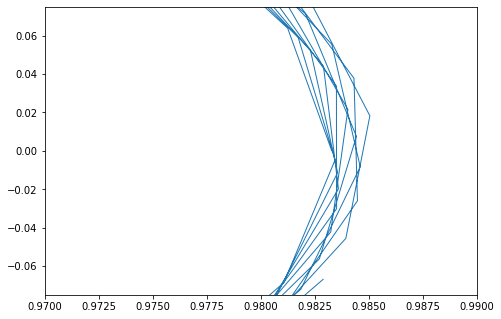

In [173]:
figure = plt.figure()
axes1 = figure.add_axes([0,0,1,1])
axes1.plot(xpos,ypos,linewidth=1) #algorithm give a little overlap on the end
axes1.set_xlim([.97,.99])
axes1.set_ylim([-.075,.075])


-----------------
## Verlet Algorithm
Even more accurate than Runge-Kutta 2nd Order  
This takes the form of common kinematics position function

(1)$$ x_{mid} = x_{ini} + v_{mid}\Delta t  $$
(2)$$ v_{mid} = v_{ini} + \frac{1}{2}a_{ini}\Delta t $$
Substituting (2) into (1):
$$ x_{fin} = x_{ini} + (v_{ini} + \frac{1}{2}a_{ini}\Delta t)\Delta t$$
or:
$$ x_{fin} = x_{ini} + v_{ini}\Delta t + \frac{1}{2}a_{ini}\Delta t^2$$

New velocity at end of interval calculated from average acceleration.
Accel at end of interval is determined from the new position
$$ v_{fin} = \frac{a_{ini}+a_{fin}}{2}\Delta t $$

# Check for accidentally going 11 years   I broke this timing part


In [174]:
def verletOrbit(x0,y0,vx0,vy0,dt=.01,tperiod=10):
    x=x0
    y=y0
    vx= vx0 
    vy= vy0 
    xpos = np.array([x0])
    ypos = np.array([y0])
    xvels = np.array([vx0])
    yvels = np.array([vy0])
    TotalE = np.array([])
    r = np.sqrt(x**2+y**2)
    ax = -G*Ms*x/r**3
    ay = -G*Ms*y/r**3
    time = np.array([])
    for i in np.linspace(0,tperiod,int(tperiod/dt)+1):
        time = np.append(time, i)
        r = np.sqrt(x**2+y**2)
        TotalE = np.append(TotalE,.5*Me*(vx**2+vy**2)-G*Me*Ms/r)


        #Now using Verlet
        xnew = x + vx*dt + .5*ax*dt**2
        ynew = y + vy*dt + .5*ay*dt**2
        xpos = np.append(xpos,xnew)
        ypos = np.append(ypos,ynew)
        #Acceleration final
        rnew = np.sqrt(xnew**2+ynew**2)
        axnew= -G*Ms*xnew/rnew**3
        aynew = -G*Ms*ynew/rnew**3 
        #Velocity final
        vxnew = vx + .5*(ax+axnew)*dt
        vynew = vy + .5*(ay+aynew)*dt

        #set new as old
        x,y,vx,vy,ax,ay = xnew,ynew,vxnew,vynew,axnew,aynew
    return xpos,ypos,TotalE,time


In [175]:
xpos,ypos,TotalE,time = verletOrbit(x0,y0,vx0,vy0,dt=.01,tperiod=10)

In [177]:
fig = go.Figure(
    data=[go.Scatter(x=xpos, y=ypos)],
    layout=go.Layout(
        title=go.layout.Title(text="Verlet Method"),
        width=550,
        height=550
    )
)
fig.update_xaxes(range=[-1.2, 1.2])
fig.update_yaxes(range=[-1.2, 1.2])
print('Even closer path consistency')
fig.show()
print("Perihelion at: ", abs(xpos.min()), 'Au')
print('Aphelion at: ',xpos.max(), 'Au')

Even closer path consistency


Perihelion at:  1.0167715272416364 Au
Aphelion at:  0.9832899 Au


Official Observations of Aphelion, Perihelion are 1.0167103 AU, 0.9832899 AU  
Verlet algorithm leads to a good approximation given intitial conditions at perihelion  
The eccentricity is small but visible in the graph with aphelion to the left

In [178]:
fig = go.Figure(
    data=[go.Scatter(x=xpos, y=ypos)],
    layout=go.Layout(
        title=go.layout.Title(text="Verlet Method,(far right side)"),
        width=550,
        height=550
    )
)
fig.update_xaxes(range=[.98, .9855])
fig.update_yaxes(range=[-.02,.025])

fig.show()

Total Energy variations:  3.924987734397242e-09


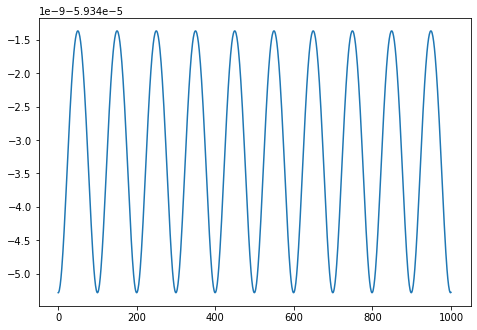

In [179]:
figure3 = plt.figure()
axes3 = figure3.add_axes([0,0,1,1])
axes3.plot(TotalE)
print(' Verlet Total Energy variations: ',TotalE.max()-TotalE.min())


Extremely Small changes in Total Energy Over 10 Years

## Examining Kepler's laws

### Kepler's 1st Law
The planets follow orbits are that elliptical, with one focus being at the sun  
In an ellipse, the sum of the distance from the foci to a single point on the ellipse  
is the same no matter what point is chosen.
We will pick 3 to test this.


In [180]:
xpos,ypos,TotalE,time = verletOrbit(x0,y0,vx0,1.2*vy0,dt=.001,tperiod=10) #changing vy0 to increase eccentricity
df = pd.DataFrame({'X':xpos[:-1],'Y':ypos[:-1],"Time":time})
#picking three time points arbitrarily 
tp1 = df.iloc[50]
tp2 = df.iloc[333]
tp3 = df.iloc[1700]
# 1 Focus is at origin, calculate other
f1 = (0,0)
s = (xpos.max()-xpos.min())/2
f2 = (-2*(s-xpos.max()),0)


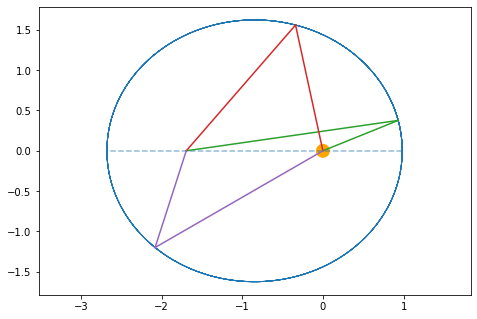

In [181]:
figure = plt.figure()
axes1 = figure.add_axes([0,0,1,1])
axes1.plot(xpos,ypos,linewidth=1)
axes1.set_xlim([-1.2,1.2])
axes1.set_ylim([-1.2,1.2])
axes1.plot([xpos.max(),xpos.min()],[0,0],'C0--',alpha=.5)
axes1.axis('equal')
#tp1
axes1.plot([0,tp1['X']],[0,tp1['Y']],'C02',[f2[0],tp1['X']],[f2[1],tp1['Y']],'C02')
#tp2
axes1.plot([0,tp2['X']],[0,tp2['Y']],'C03',[f2[0],tp2['X']],[f2[1],tp2['Y']],'C03')
#tp3
axes1.plot([0,tp3['X']],[0,tp3['Y']],'C04',[f2[0],tp3['X']],[f2[1],tp3['Y']],'C04')

circle1 = plt.Circle((0, 0), .08, color='orange')
axes1.add_artist(circle1)

In [182]:
# tp1
tp1Dist1=np.linalg.norm([0-tp1[0],0-tp1[1]])
tp1Dist2=np.linalg.norm([f2[0]-tp1[0],f2[1]-tp1[1]])
tp1Dist= tp1Dist1 + tp1Dist2
#tp2
tp2Dist1=np.linalg.norm([0-tp2[0],0-tp2[1]])
tp2Dist2=np.linalg.norm([f2[0]-tp2[0],f2[1]-tp2[1]])
tp2Dist= tp2Dist1 + tp2Dist2
#tp3
tp3Dist1=np.linalg.norm([0-tp3[0],0-tp3[1]])
tp3Dist2=np.linalg.norm([f2[0]-tp3[0],f2[1]-tp3[1]])
tp3Dist= tp3Dist1 + tp3Dist2
print('Dist First Point: ',tp1Dist)
print('Dist Second Point:',tp2Dist)
print('Dist Third Point: ',tp3Dist)

Dist First Point:  3.6598877810661485
Dist Second Point: 3.6598932645090683
Dist Third Point:  3.6598659816563295


### Kepler's 2nd Law
The area swept out by the orbit for a given  Δ𝑡  equals another area of the orbit
during that same  Δ𝑡 
Adjust intial conditions to exaggerate the eccentricity of earth's orbit

In [183]:
# should shift ellipse to the left, as if impulse initially during prograde
xpos,ypos,TotalE,time = verletOrbit(x0,y0,vx0,1.1*vy0,dt=.001,tperiod=10)

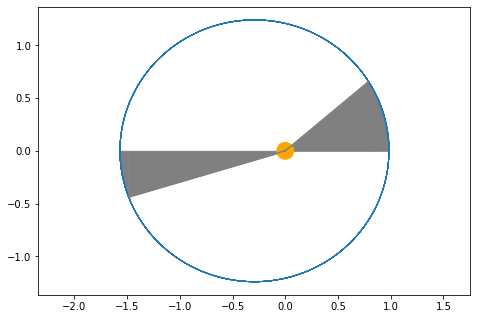

In [184]:
figure = plt.figure()
axes1 = figure.add_axes([0,0,1,1])
axes1.plot(xpos,ypos,linewidth=1)
axes1.set_xlim([-1.2,1.2])
axes1.set_ylim([-1.2,1.2])
axes1.axis('equal')
line1 = axes1.plot([0,xpos[100]],[0,ypos[100]],color='grey')
line2 = axes1.plot([0,xpos[821]],[0,ypos[821]],color='grey')
axes1.fill_between(xpos[0:101], 0, ypos[:101],color='grey')
axes1.fill_between([0,xpos[100]], 0, [0,ypos[100]],color="grey")
#bottom

axes1.fill_between([0,xpos[821]],[0,ypos[821]],0,color='grey')
axes1.fill_between(xpos[720:821],ypos[720:821],0,color="grey")
circle1 = plt.Circle((0, 0), .08, color='orange')
axes1.add_artist(circle1)


Picking Time interval 0 to .1, and .72 to .820  
time = .72 roughly at aphelion 
Since dt is small, using Herons formula and summing all triangles within region1   
and region2 can approximate the areas, although this will be an underestimate

Heron's formula: 
$$ Area = \sqrt{p(p-a)(p-b)(p-c)} $$
$$ p = \frac{a+b+c}{2} $$

In [185]:
df = pd.DataFrame({'X':xpos[:-1],'Y':ypos[:-1],"Time":time})
df[df['Time']==.1]
df[df['Time']==.72]


,X,Y,Time
720,-1.567555,0.000874,0.72


In [186]:
slice1 = df.iloc[0:101]
slice2 = df.iloc[720:821]
area1 = 0
area2 = 0
for i in range(0,len(slice1)-1):
    x0,y0,x1,y1 = slice1.iloc[i][0],slice1.iloc[i][1],slice1.iloc[i+1][0],slice1.iloc[i+1][1]
    a=np.sqrt(x0**2+y0**2)
    b=np.sqrt(x1**2+y1**2)
    c=np.sqrt((x1-x0)**2+(y1-y0)**2)
    p = (a+b+c)/2
    area1 += np.sqrt(p*(p-a)*(p-b)*(p-c))
    
    #redefining these vars for slice2
    x0,y0,x1,y1 = slice2.iloc[i][0],slice2.iloc[i][1],slice2.iloc[i+1][0],slice2.iloc[i+1][1]
    a=np.sqrt(x0**2+y0**2)
    b=np.sqrt(x1**2+y1**2)
    c=np.sqrt((x1-x0)**2+(y1-y0)**2)
    p = (a+b+c)/2
    area2 += np.sqrt(p*(p-a)*(p-b)*(p-c))
print('Area in region 1: ',area1, 'Au^2', '\nArea in region 2: ',area2, 'Au^2')
    

Area in region 1:  0.34536127308063946 Au^2 
Area in region 2:  0.34536127308063774 Au^2


## Kepler's 3rd Law
$$ (\frac{T_1}{T_2})^2 =  (\frac{s_1}{s_2})^3  $$
The square of the ratio of periods two different orbits equals the square of the ratio of their semimajor axes
Creating two orbits to check:  
Orbit1 semimajor axis on y=0  
Orbit2 semimajor axis on x=0

In [187]:
#resetting a few initial vals
x0 = 0.9832899 #Au perihelion
y0 = 0
vx0 = 0
# vy0 = 2*np.pi # orbital velocity in au and yr
vy0 = 30.29/1.496e+8*3.154e+7

In [188]:
xpos1,ypos1,TotalE1,time1 = verletOrbit(x0,y0,vx0,vy0=7,dt=.001,tperiod=10)
xpos2,ypos2,TotalE2,time2 = verletOrbit(0,x0,vx0=-7.5,vy0=0,dt=.001,tperiod=10)


(-1.6915910925840003,
 1.6559899945452812,
 -2.4764846190564196,
 1.4069069129908596)

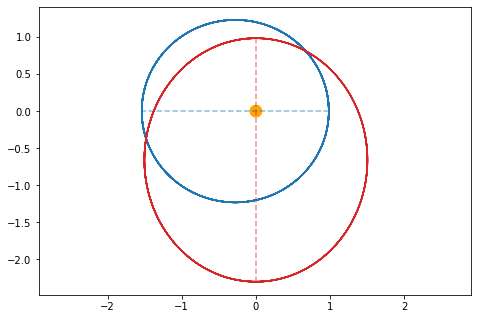

In [189]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(xpos1,ypos1,'C0',xpos2,ypos2,'C3')
axes.plot([xpos1.max(),xpos1.min()],[0,0],c ='C0',ls='--',alpha=.5)
axes.plot([0,0],[ypos2.min(),ypos2.max()],c ='C3',ls='--',alpha=.5)
circle1 = plt.Circle((0, 0), .08, color='orange')
axes.add_artist(circle1)
axes.axis('equal')

In [190]:
# calculate The orbital period for both orbits
df1 = pd.DataFrame({'X':xpos1[:-1],'Y':ypos1[:-1],"Time":time1})
df2 = pd.DataFrame({'X':xpos2[:-1],'Y':ypos2[:-1],"Time":time2})
# 2*(time when crosses semimajor axis)
T1idx =  2*np.argmax(df1['X'].diff()>0)
T1 = df1['Time'][T1idx]
T2idx = 2*np.argmax(df2['Y'].diff()>0)
T2 = df2['Time'][T2idx]
#calculate semimajor axes
s1= (xpos1.max()-xpos1.min())/2
s2= (ypos2.max()-ypos2.min())/2

In [191]:
Tratio = (T1/T2)**2
sratio = (s1/s2)**3
print('T_ratio^2: ',Tratio,'\nS_ratio^3: ',sratio)

T_ratio^2:  0.4533522004240586 
S_ratio^3:  0.4536194869772409
